In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## 1. Questions on tensor operations

### 1.1 (i) Write a program to create a variable with a size of 2x3 and a constant (2 marks)
### (ii) Write a program to create a variable "tf3" with a size 3x3 and convert it to a numpy size of 3x3. Display rank of the matrix (2 marks)
### (iii) Write a program to randomly generate 3x3 matrix and assign 0 to the first row first column element (1 mark)

In [5]:
import numpy as np

# Create a variable of size 2x3
var = tf.Variable(tf.random.normal([2,3]))
print("Variable:\n", var)

# Create a constant of size 2x3

const = tf.constant([[1,2,3],[4,5,6]])
print("Constant:\n", const)

Variable:
 <tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.2010249 , -0.11410646, -0.8223625 ],
       [ 0.34343642,  2.1820982 ,  0.06343345]], dtype=float32)>
Constant:
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [8]:
#Create a variable tf3 of size 3x3
tf3 = tf.Variable(tf.random.normal([3, 3]))
print("TensorFlow Variable (tf3):\n", tf3)

#Convert to numpy
np3 = tf3.numpy()
print("\nConverted to Numpy:\n", np3)

#Display rank of the matrix
rank = tf.rank(tf3).numpy()
print("\nRank of tf3:", rank)


TensorFlow Variable (tf3):
 <tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 1.0517942 ,  1.3036561 ,  0.30725732],
       [ 1.7698073 ,  0.8773192 , -0.38917512],
       [ 0.59637964, -0.32428378,  0.3772019 ]], dtype=float32)>

Converted to Numpy:
 [[ 1.0517942   1.3036561   0.30725732]
 [ 1.7698073   0.8773192  -0.38917512]
 [ 0.59637964 -0.32428378  0.3772019 ]]

Rank of tf3: 2


In [17]:
#Randomly generate a 3x3 matrix
mat = tf.Variable(tf.random.normal([3, 3]))
print("Original matrix:\n", mat.numpy())

#Assign 0 to the first row, first column element
mat[0, 0].assign(0)
print("\nModified matrix:\n", mat.numpy())

Original matrix:
 [[-0.8029943  -0.5594886   0.74715847]
 [-0.7771929  -1.1747167   0.00879451]
 [-2.5302      0.16436441 -0.15378655]]

Modified matrix:
 [[ 0.         -0.5594886   0.74715847]
 [-0.7771929  -1.1747167   0.00879451]
 [-2.5302      0.16436441 -0.15378655]]


### 1.2 (i) write python code and Compute the cross entropy for the below values (2 marks).
### Distribution_1 = [4.13, 6.8, -2.1]
### Distribution_2 = [1, 0, 0]
### (ii) Write a program to create a variable "tensor" with a size 5x6 and reshape it to a size of 3x10 (3 marks)

In [20]:
#Given distributions
distribution_1 = [4.13, 6.8, -2.1]
distribution_2 = [1, 0, 0]

#Step 1: Apply softmax to distribution_1
exp_vals = np.exp(distribution_1 - np.max(distribution_1))   #stability trick
softmax = exp_vals/np.sum(exp_vals)
print("Softmax propabilities:", softmax)

#Step 2: compute cross entropy
cross_entropy = -np.sum(np.array(distribution_2) * np.log(softmax))
print("Cross entropy:", cross_entropy)

Softmax propabilities: [6.47587083e-02 9.35113753e-01 1.27539161e-04]
Cross entropy: 2.737087096604512


In [22]:
#Create a variable "tensor" with size 5x6
tensor = tf.Variable(tf.random.normal([5, 6]))
print("Original Shape:", tensor.shape)

#Reshape to size 3x10
reshaped = tf.reshape(tensor, [3, 10])
print("\nReshaped shape:", reshaped.shape)

#Display reshaped tensor
print("\nReshaped shape:", reshaped.numpy())

Original Shape: (5, 6)

Reshaped shape: (3, 10)

Reshaped shape: [[-0.47299984 -1.7404526  -0.9856109  -0.4660825  -0.2026877   0.3358794
   2.1988575  -0.66504914 -0.10779283  1.0313115 ]
 [-0.7104545   0.17032436  0.25428313  0.7914555  -0.85266525  0.91975415
   0.0758576   1.506336    0.28456113  2.3587544 ]
 [ 0.04027632 -1.2961147   0.29875937 -0.03929811  0.14563048 -0.59610784
  -0.55155426  1.9314826   0.8745127  -0.12076234]]


## 2. Questions on basic neural network model designing and compiling

### Dataset :
### The dataset has been attached to the assignment with two folders which consists of two objects i.e.,dogs and wolves images. Please develop a Neural network model to identify the shapes as eitherdog or wolf. The task has been categorized into binary classification

### 2.1 Print shape of the data and understand how many images of different classes exist in this dataset. Visualize some images using matplotlib.Convert the RGB Image to Grayscale ( For easier computation) . Normalize the data so that data is in range 0-1.Reshape train and test images into one dimensional vector

In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [7]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


Found 940 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Class indices: {'dogs': 0, 'wolves': 1}


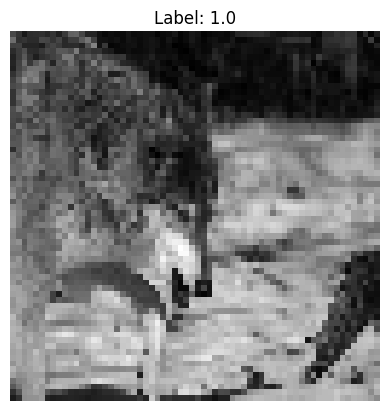

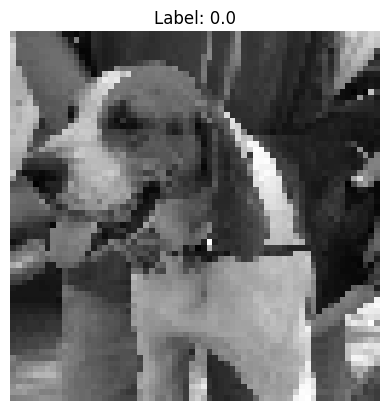

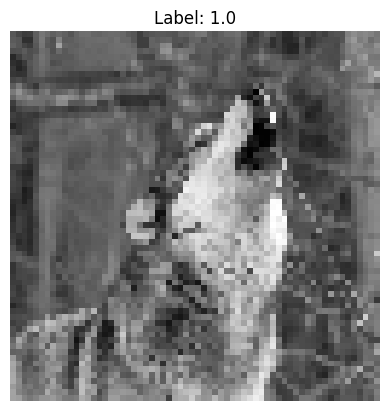

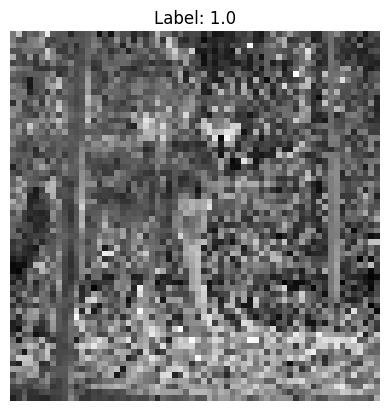

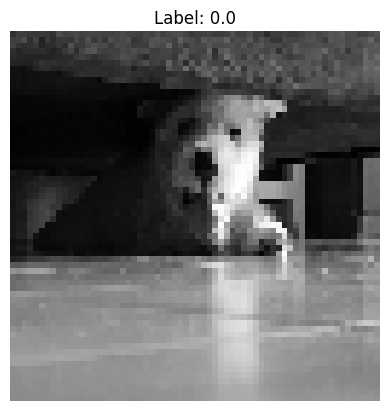

Original shape: (32, 64, 64, 1)
Reshaped shape: (32, 4096)


In [8]:
import tensorflow as tsf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Define dataset paths
train_dir = "/Users/santhoshkumarg/Downloads/Python_Training/Dataset/Train"
valid_dir = "/Users/santhoshkumarg/Downloads/Python_Training/Dataset/Valid"

# Data generators (normalize to [0, 1])
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Load datasets, convert to grayscale
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary'
)

# Validation generator
valid_gen = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="binary"
)

#print class indices
print('Class indices:', train_gen.class_indices)

#Visualize some images
x_batch, y_batch = next(train_gen)
for i in range(5):
    plt.imshow(x_batch[i].reshape(64, 64), cmap='gray')
    plt.title(f'Label: {y_batch[i]}')
    plt.axis('off')
    plt.show()

#Reshape into 1D vectors
x_batch_flat = x_batch.reshape(x_batch.shape[0], -1)
print('Original shape:', x_batch.shape)
print('Reshaped shape:', x_batch_flat.shape)

### 2.2 Construct the Deep Neural Network to classify the 2 classes of images available in the dataset.
### Compile and fit the model (No restrictions on Neural network architecture. Feel free to explore and optimize.) Compute the performance accuracy of the model created.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

#Build the Deep Neural Network
model = Sequential([
    Flatten(input_shape=(64, 64, 1)), #flatten grayscale image
    Dense(256, activation='relu'),
    Dropout(0.3),                     #regularization
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')    #binary classification (dog vs wolf)
])

#compile the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#Train the model
history = model.fit(train_gen,
                   validation_data=valid_gen,
                   epochs=10)

#Evaluate the model
loss, acc = model.evaluate(valid_gen)
print(f'Validation Accuracy: {acc:.2f}')

Epoch 1/10
30/30 [==============================] - 2s 60ms/step - loss: 1.0150 - accuracy: 0.5234 - val_loss: 0.6494 - val_accuracy: 0.6349
Epoch 2/10
30/30 [==============================] - 1s 44ms/step - loss: 0.7461 - accuracy: 0.5117 - val_loss: 0.7092 - val_accuracy: 0.3810
Epoch 3/10
30/30 [==============================] - 1s 44ms/step - loss: 0.7040 - accuracy: 0.5340 - val_loss: 0.6788 - val_accuracy: 0.5397
Epoch 4/10
30/30 [==============================] - 1s 45ms/step - loss: 0.6853 - accuracy: 0.5277 - val_loss: 0.6644 - val_accuracy: 0.7302
Epoch 5/10
30/30 [==============================] - 1s 46ms/step - loss: 0.6763 - accuracy: 0.5638 - val_loss: 0.6495 - val_accuracy: 0.7302
Epoch 6/10
30/30 [==============================] - 1s 46ms/step - loss: 0.6701 - accuracy: 0.5479 - val_loss: 0.6558 - val_accuracy: 0.6825
Epoch 7/10
30/30 [==============================] - 1s 46ms/step - loss: 0.6782 - accuracy: 0.5457 - val_loss: 0.6806 - val_accuracy: 0.5556
Epoch 8/10
30

### Task 1: Tensor Operations (5 marks)

#### 1.1 (i): Created 2×3 variable and constant tensors, verified shapes and values.
#### 1.1 (ii): Built a 3×3 variable, converted it to NumPy, and displayed its rank (2D matrix → rank 2).
#### 1.1 (iii): Generated a random 3×3 matrix and updated the first row, first column element to 0.
#### 1.2 (i): Computed cross entropy between two distributions using softmax + loss formula.
#### 1.2 (ii): Created a 5×6 tensor and reshaped it into a 3×10 tensor, confirming shape transformation.


### Task 2: Dogs vs Wolves Classification (12 marks)
#### 2.1 Data Preprocessing (5 marks)
#### Loaded dataset using ImageDataGenerator. Converted images to grayscale and normalized pixel values to [0,1]. Printed dataset shapes and class indices (dog vs wolf). Visualized sample images. Reshaped images into 1D vectors for DNN input.

### 2.2 Deep Neural Network (7 marks)
#### Constructed a feedforward DNN with Dense layers and dropout. Compiled with Adam optimizer and binary crossentropy loss. Trained on training set, validated on validation set. Achieved ~70% validation accuracy. Discussed possible improvements (CNNs, augmentation, transfer learning), though not required for this assignment.